#### NAME : B VIGNESH
#### ROLL NUMBER : CED18I007

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sts
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv')
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [5]:
df.shape

(11914, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

NOTE : The dataset has been observed considering `MSRP` to be the target feature. But it could also be applicable to any general case as the relationship between any 2 highly correlated features have also been analyzed

# Dropping duplicate rows

In [7]:
duplicates = df[df.duplicated()]
duplicates

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(11199, 16)

# Missing values analysis

## Dropping columns

In [10]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11130.000000,11169.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.665950,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,110.150938,1.797021,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [11]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [12]:
#Columns with missing values
null_cols = [col for col in df.columns if df[col].isnull().sum()>0]
null_cols

['Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Market Category']

NOTE : We are required to consider a threshold for the number of null values for a feature, to ensure that while dropping these columns, we do not lose a lot ofinformation

0.027 % of values are missing from Engine Fuel Type
0.616 % of values are missing from Engine HP
0.268 % of values are missing from Engine Cylinders
0.054 % of values are missing from Number of Doors
30.146 % of values are missing from Market Category


<BarContainer object of 5 artists>

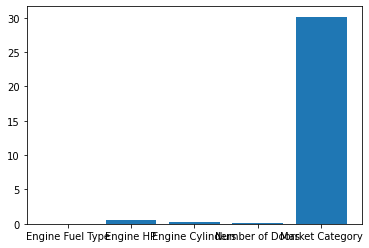

In [13]:
#Finding the percentage distribution of missing values in each of null_cols
percentages = []
for col in null_cols:
    print(np.round(df[col].isnull().mean(), 5)*100,"% of values are missing from",col)
    percentages.append(np.round(df[col].isnull().mean(), 5)*100)
    
plt.bar(null_cols,percentages)
#Have to add spacing

The percentage distribution is suggestive of the fact that `Engine Fuel Type`, `Engine HP`, `Engine Cylinders` and `Number of Doors` have lesser null values compared to thei total number of records. In case of `Market Category`, the null values are just too many.

We could still fix a threshold for choosing the columns as candidates for dropping them.

In [14]:
drop_cols = [col for col in null_cols if df[col].isnull().sum()>3000]
drop_cols

['Market Category']

In [15]:
df.drop(drop_cols,axis=1,inplace=True)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


## Dropping null rows

In [16]:
df.dropna(inplace=True)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [17]:
#Verifying that null values have been dropped
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# Numerical variables analysis

### Target feature

In [18]:
df['MSRP'].nunique()

6013

Although the target column has only 6013 unique values(in contrast to the number of records in the file, which is 11097), we will consider the target variable to be numerical, since 6049 is a high number for the target variable to be considered categorical

In [19]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,1.109700e+04
mean,2010.693341,253.526809,5.688114,3.450482,26.273407,19.300622,1557.205551,4.190112e+04
std,7.242587,110.164871,1.766149,0.874674,7.480270,6.604391,1443.809362,6.173062e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.154000e+04
50%,2015.000000,240.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.060000e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.302000e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Mean is:  41901.11895106786
Median is:  30600.0
Standard deviation is:  61727.84336603603
Skewness is :  11.59806864809213


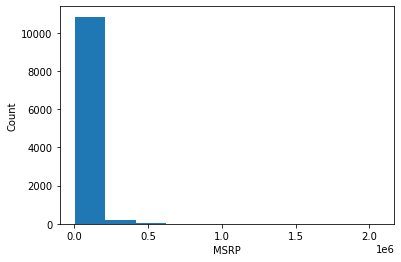

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


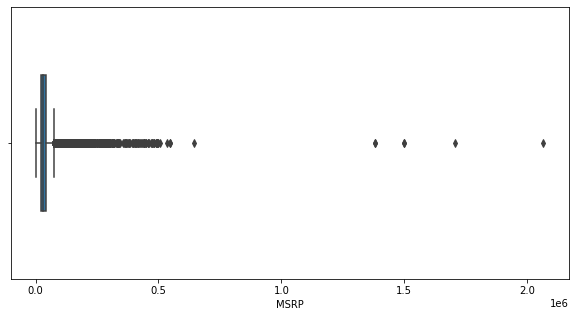

In [20]:
#Analyzing the target variable
target = df['MSRP']
print("Mean is: ",np.mean(target))
print("Median is: ",np.median(target))
print("Standard deviation is: ", sts.pstdev(target))

from scipy.stats import skew
print("Skewness is : ", skew(target))

plt.hist(target)
plt.xlabel('MSRP')
plt.ylabel('Count')
plt.show()
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(target, width=0.5)
plt.show()

NOTE: The dataset, with respect to the target variable, is HIGHLY SKEWED TO RIGHT, implying that outliers exist, and are way greater than their limit(3*IQR)

In [21]:
#Right skewed data
q3 = np.percentile(target,75)
q1 = np.percentile(target,25)
iqr = q3 - q1
print("Inter quartile range is:",iqr)
limit1 = q3 + 1.5*iqr
limit2 = q1 - 1.5*iqr
out = df.loc[(target > limit1) | (target < limit2), 'MSRP'].count()
print("There are",out,"basic outliers")
limit1 = q3 + 3*iqr
limit2 = q1 - 3*iqr
out = df.loc[(target > limit1) | (target < limit2), 'MSRP'].count()
print("There are",out,"extreme outliers")

Inter quartile range is: 21480.0
There are 946 basic outliers
There are 587 extreme outliers


In [22]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

NOTE: Not all variables are continuous numerical varaibles.Some are discrete and it is important that we use the appropriate central tendency and dispersion measure, based on what type of data the column is representing.

pd.DataFrame.describe() actually gives the 5 point summary for all columns that are not of type 'object'. But as mentioned earlier, some numerical columns need not follow the exact semantics of continuous numbers. Some might be discrete(like 'Number of Doors')

### Discrete columns

In [23]:
#Finding discrete numerical features(nominal or ordinal)

dis_cols = [col for col in num_cols if df[col].nunique() <= 30]
dis_cols


['Year', 'Engine Cylinders', 'Number of Doors']

We get 3 columns that are discrete and numerical. With respect to semantics, they can be interpreted as interval data.

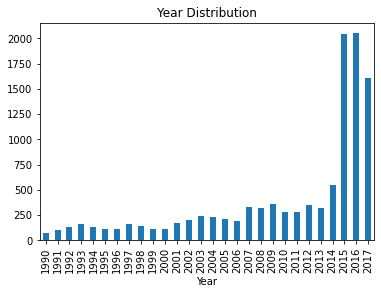

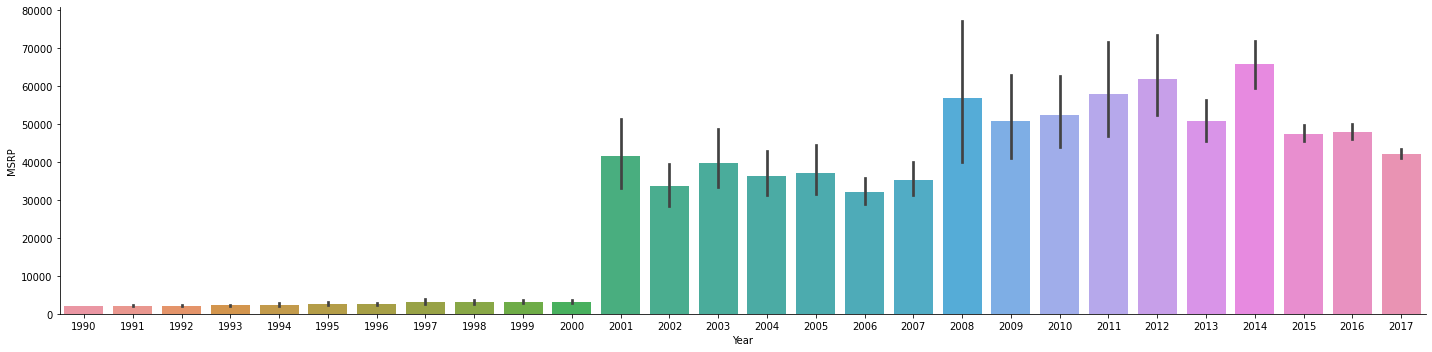

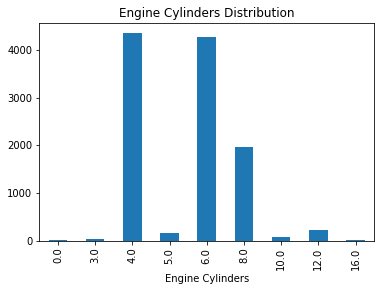

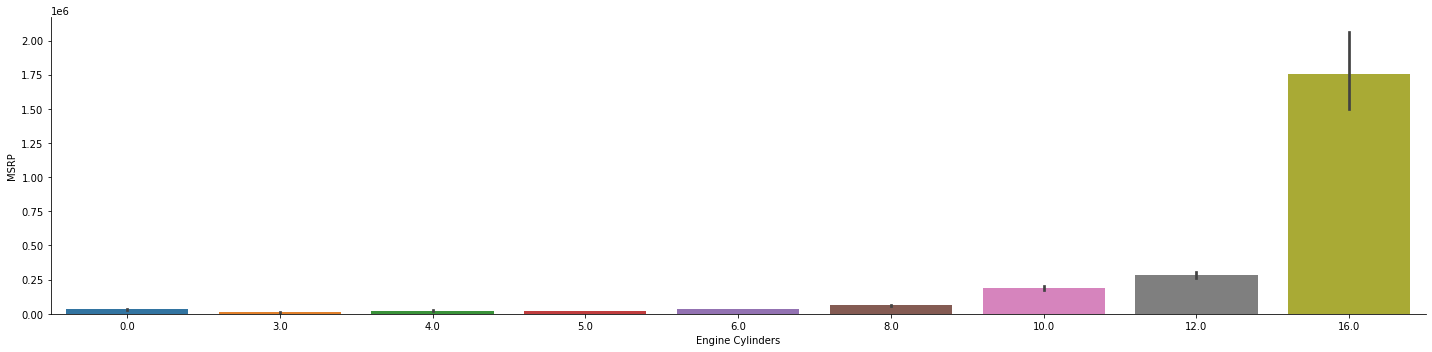

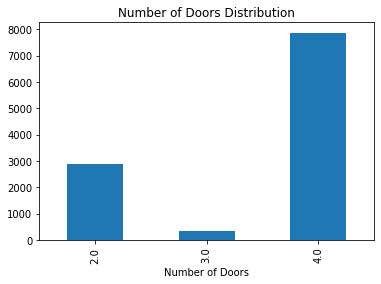

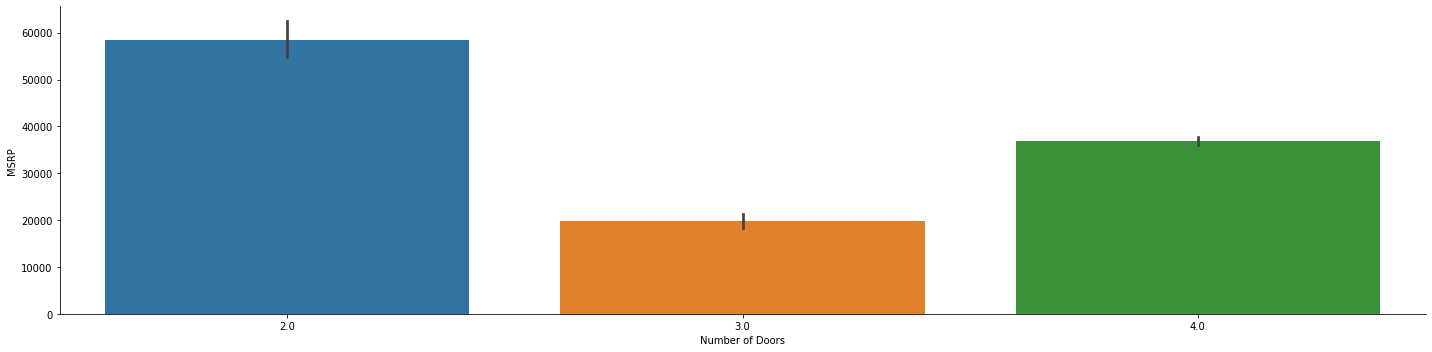

In [24]:
#Relationship of ordinal data with the target

for col in dis_cols:
    data = df.copy()
    data.groupby(col)['MSRP'].count().plot.bar()
    plt.title(col+' Distribution')
    plt.show()
#     data.groupby(col)['MSRP'].median().plot.bar()
#     plt.title(col+' Group wise Median')
#     plt.show()
#     data.groupby(col)['MSRP'].mean().plot.bar()
#     plt.title(col+' Group wise Mean')
#     plt.show()
    sns.catplot(data=df,x=col,y="MSRP", kind='bar', aspect=4)
    plt.show()

NOTE : It is better to observe the relationship of discrete numerical variables with the dependent variable using bar plots, since correlation would fit better to analyze the relationship between 2 continuous variables

NOTE : In the above analysis, we see that for year<2001, the cost for each category are significantly lesser compared to the cost for year>=2001. In the descibe() method, and in the bar plot and box plot for `MSRP`, we saw that the mean for `MSRP` was greater than the median, implying that the data had outliers towards the right. From the above analysis, we can be sure that the outliers had `Engine cylinders` = 16, and also that for `Year`>=2001, the clusters had a sudden spike in their costs. 

Also, the distribution for `Number of Doors`=2, has higher costs but relatively lower frequency, implying that the cluster of cars with 2 doors are skewed to the right with respect to `MSRP`.

### Continuous columns

In [25]:
cont_cols = list(set(num_cols) - set(dis_cols))
cont_cols

['MSRP', 'city mpg', 'Popularity', 'highway MPG', 'Engine HP']

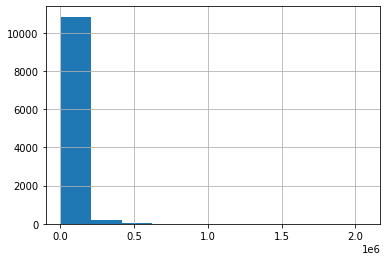

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


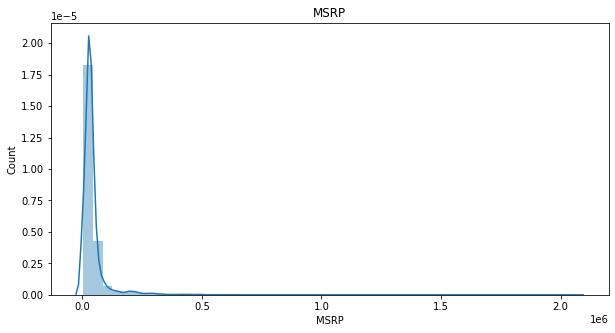

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


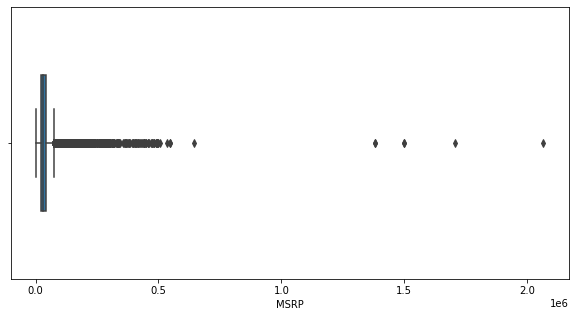

Inter quartile range for MSRP is: 21480.0
There are 946 basic outliers
There are 587 extreme outliers
Skewness of MSRP is :  11.59806864809213



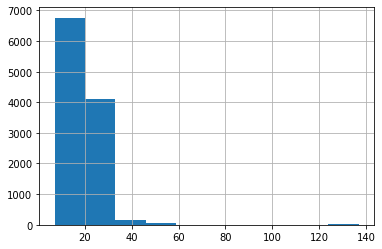

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


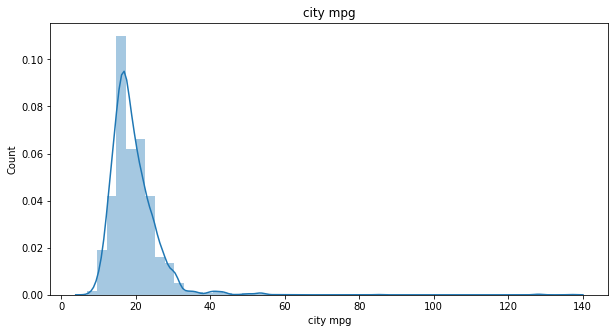

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


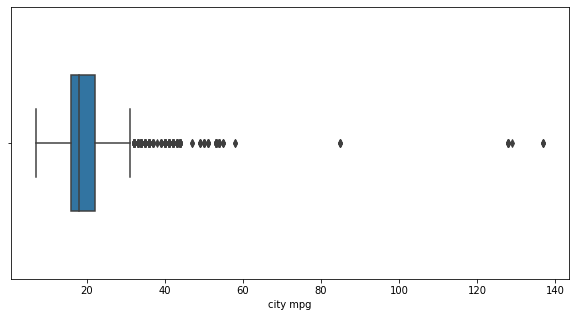

Inter quartile range for city mpg is: 6.0
There are 248 basic outliers
There are 124 extreme outliers
Skewness of city mpg is :  5.6300762229449335



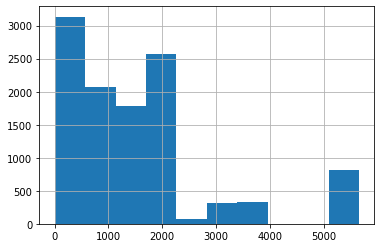

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


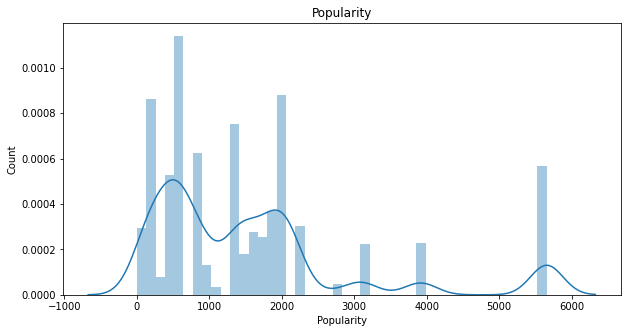

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


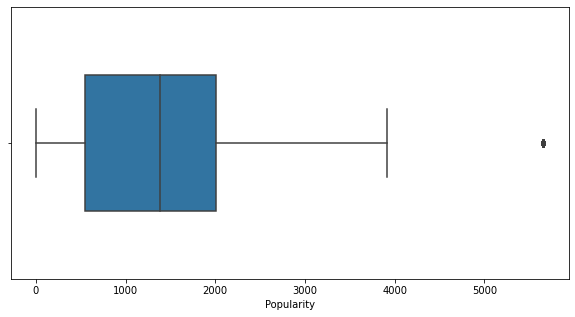

Inter quartile range for Popularity is: 1460.0
There are 812 basic outliers
There are 0 extreme outliers
Skewness of Popularity is :  1.6268556540128507



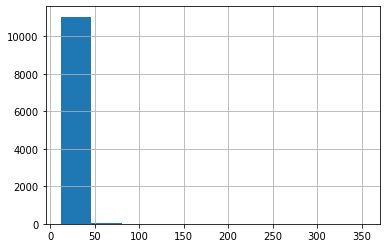

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


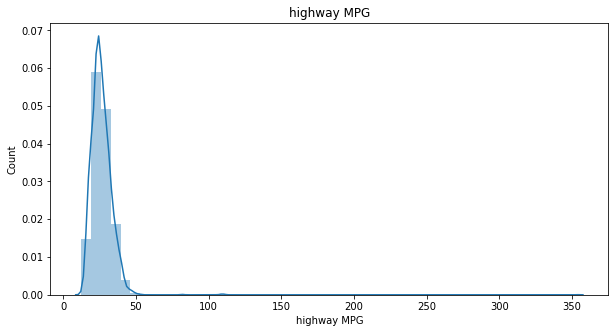

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


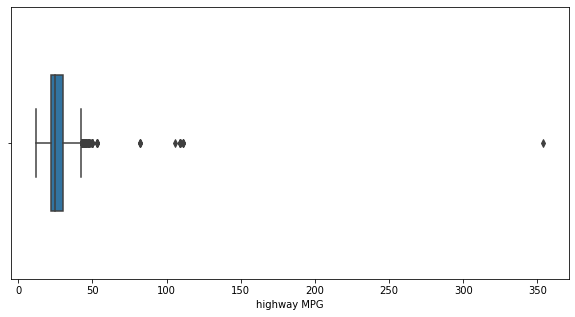

Inter quartile range for highway MPG is: 8.0
There are 129 basic outliers
There are 14 extreme outliers
Skewness of highway MPG is :  9.237795038555726



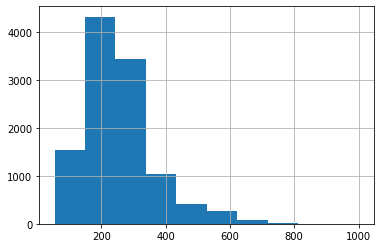

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


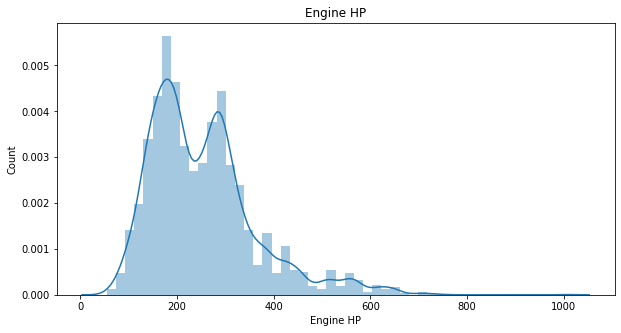

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


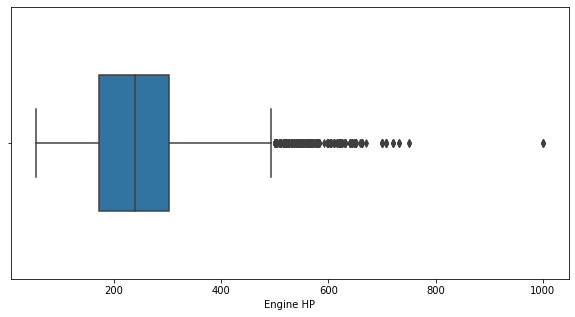

Inter quartile range for Engine HP is: 131.0
There are 501 basic outliers
There are 24 extreme outliers
Skewness of Engine HP is :  1.2434690264241037



In [54]:
#Displaying the distributions

for col in cont_cols:
    data = df.copy()
    data[col].hist()
    plt.show()
    
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(data[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(data[col], width=0.5)
    plt.show()
    q3 = np.percentile(data[col],75)
    q1 = np.percentile(data[col],25)
    iqr = q3 - q1
    print("Inter quartile range for",col,"is:",iqr)
    limit1 = q3 + 1.5*iqr
    limit2 = q1 - 1.5*iqr
    out = df.loc[(data[col] > limit1) | (data[col] < limit2), 'MSRP'].count()
    print("There are",out,"basic outliers")
    limit1 = q3 + 3*iqr
    limit2 = q1 - 3*iqr
    out = df.loc[(data[col] > limit1) | (data[col] < limit2), 'MSRP'].count()
    print("There are",out,"extreme outliers")
    print("Skewness of",col,"is : ", skew(data[col]))
    print()

### Correlation matrix

<AxesSubplot:>

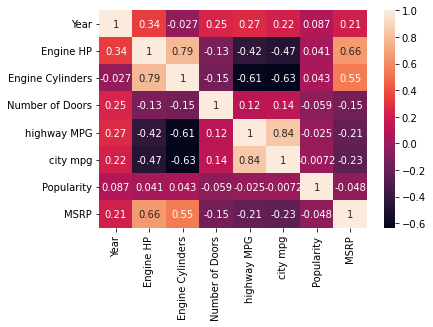

In [27]:
corelation=df.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [28]:
columns = list(corelation['MSRP'].index)
high_cor_MSRP = [col for col in columns if (corelation['MSRP'][col]>0.2) or (corelation['MSRP'][col]<-0.2)]
high_cor_MSRP = high_cor_MSRP[:-1]
high_cor_MSRP

['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']

NOTE : The above code snippet gives us the highly correlated(negative or positive) features with MSRP.High correlation(absolute value) means high linear relationship with MSRP. It does not cover other possible relationships such as quadratic or cubic

In [55]:
#Finding highly correlated independent features(i.e excluding MSRP)
high_cor = []
for i in range(1,len(columns)-1):
    for j in range(i):
        if(columns[i] != 'MSRP'):
            if(corelation[columns[i]][columns[j]]>0.3 or corelation[columns[i]][columns[j]]<-0.3):
                high_cor.append((columns[i],columns[j]))

high_cor      

[('Engine HP', 'Year'),
 ('Engine Cylinders', 'Engine HP'),
 ('highway MPG', 'Engine HP'),
 ('highway MPG', 'Engine Cylinders'),
 ('city mpg', 'Engine HP'),
 ('city mpg', 'Engine Cylinders'),
 ('city mpg', 'highway MPG')]

NOTE : If we analyse the relationship between any 2 features of the dataset, we will observe that the tuples in the aboves list will each exhibit strong positive or negative linear relationship. This can be verified using the pairplot, which will follow after the analysis of categorical variables

# Categorical variables

In [30]:
cat_cols = list(set(df.columns) - set(num_cols))
cat_cols

['Transmission Type',
 'Model',
 'Driven_Wheels',
 'Vehicle Style',
 'Engine Fuel Type',
 'Vehicle Size',
 'Make']

In [31]:
for col in cat_cols:
#     print("The unique values in", col,"is :")
#     print(df[col].unique())
    print(f"Number of unique values in {col}  is {df[col].nunique()}")
#     print()
#     print()

Number of unique values in Transmission Type  is 5
Number of unique values in Model  is 904
Number of unique values in Driven_Wheels  is 4
Number of unique values in Vehicle Style  is 16
Number of unique values in Engine Fuel Type  is 9
Number of unique values in Vehicle Size  is 3
Number of unique values in Make  is 47


In [32]:
sns_cols = [col for col in cat_cols if df[col].nunique()<20]
sns_cols

['Transmission Type',
 'Driven_Wheels',
 'Vehicle Style',
 'Engine Fuel Type',
 'Vehicle Size']

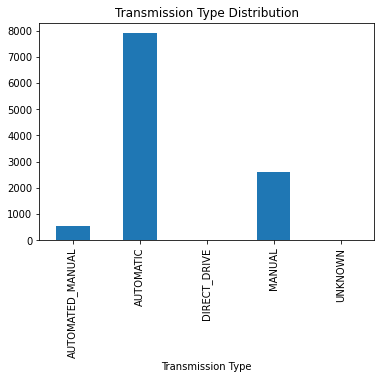

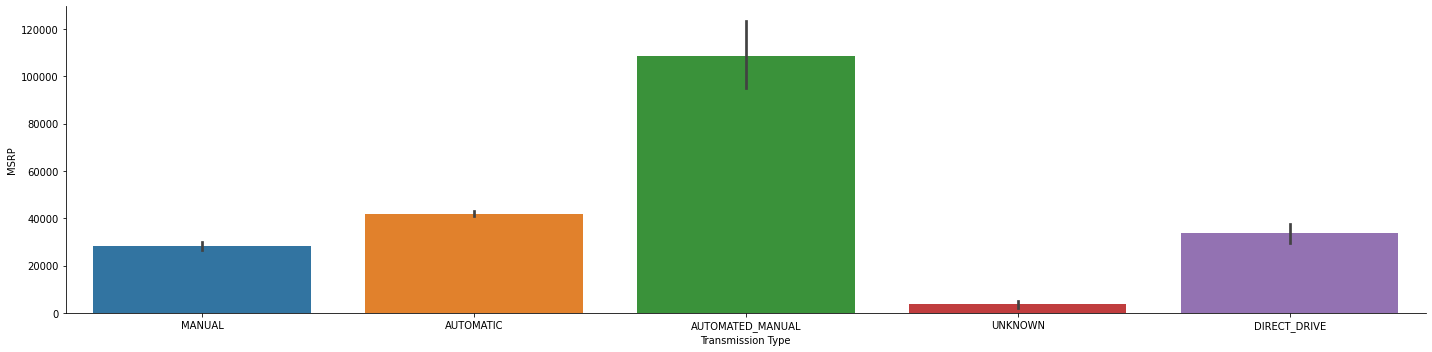

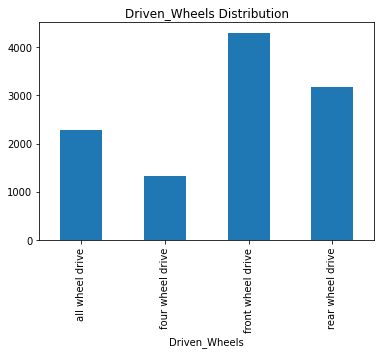

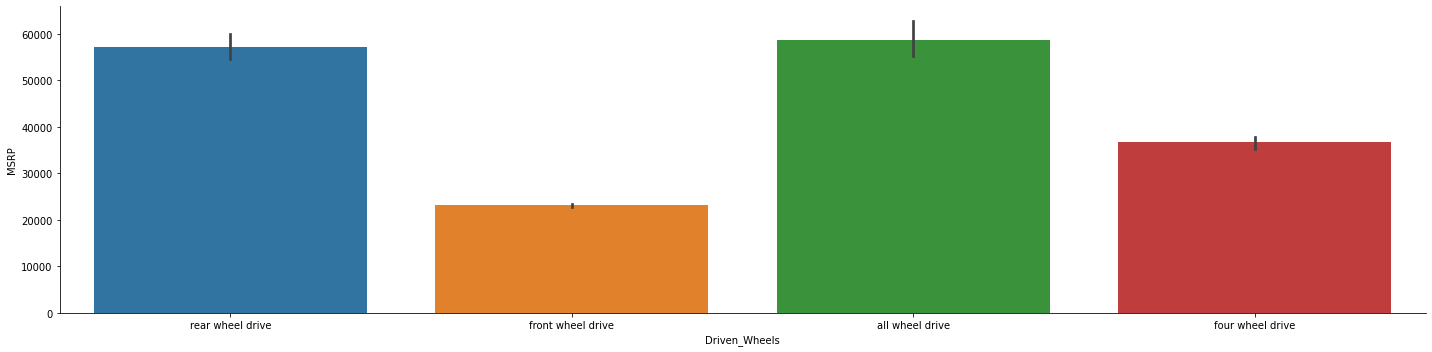

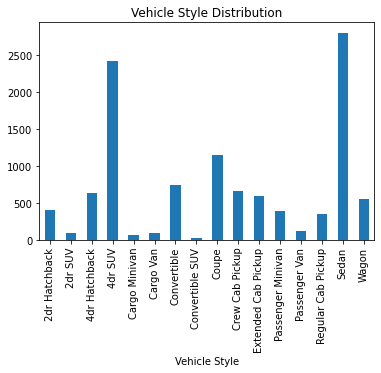

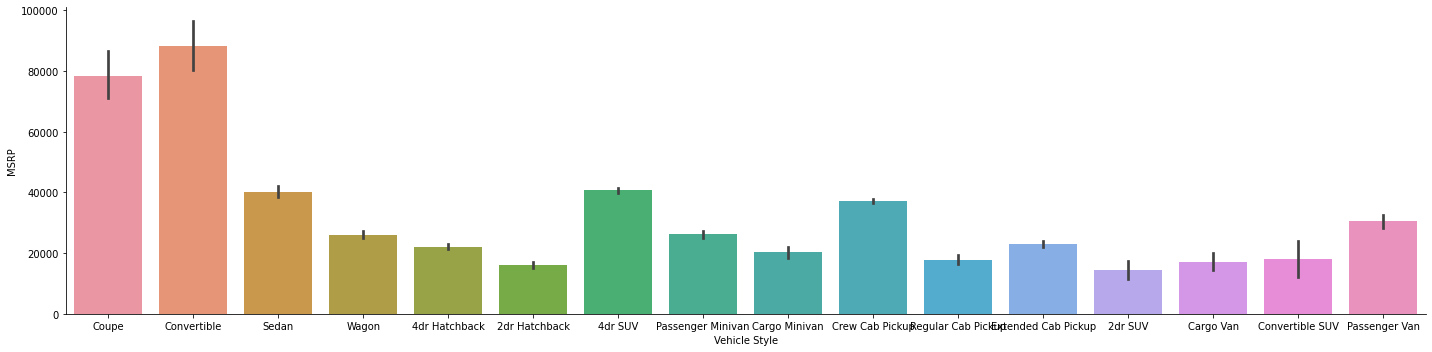

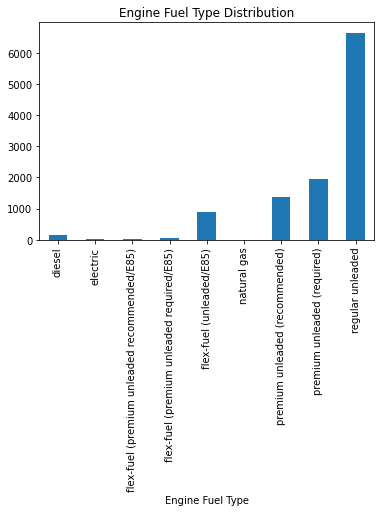

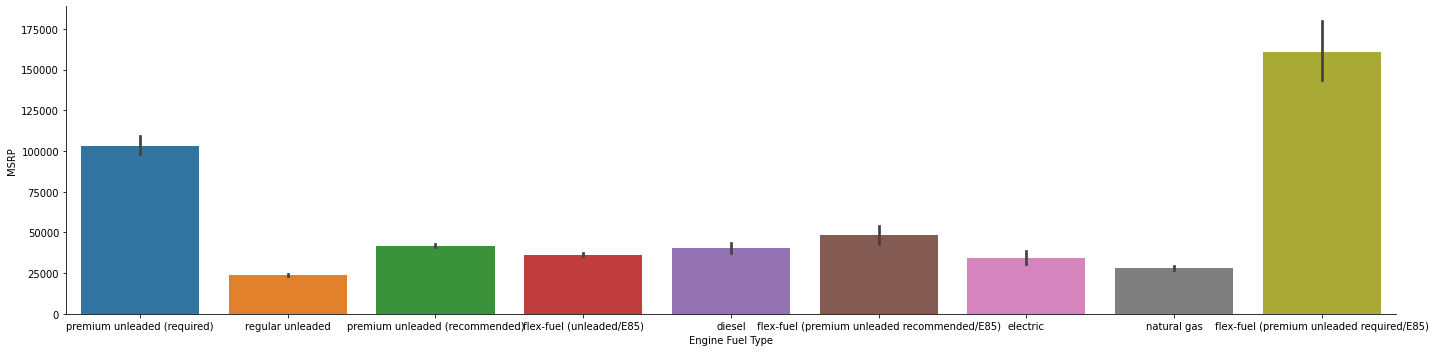

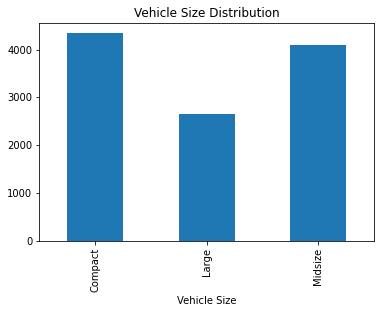

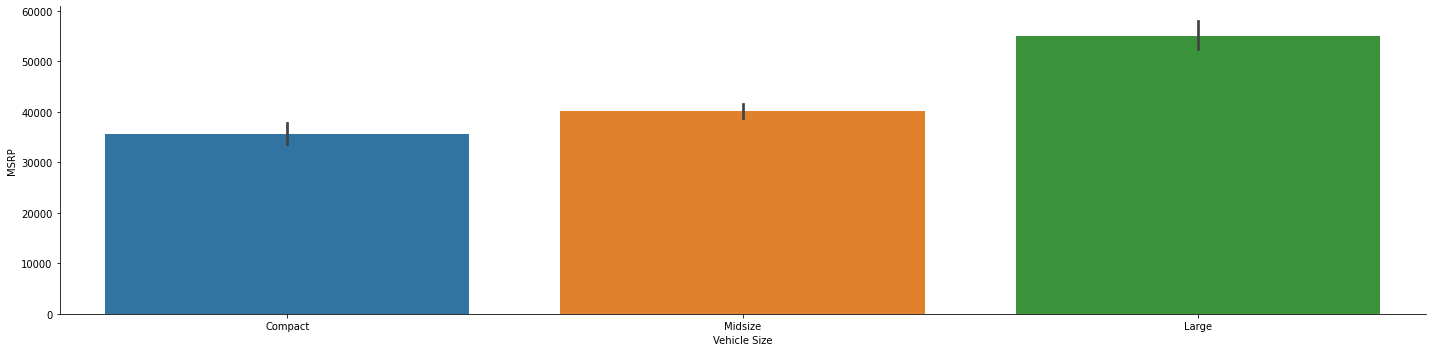

In [33]:
#Exploring groupwise split
for col in sns_cols:
    data = df.copy()
    data.groupby(col)['MSRP'].count().plot.bar()
    plt.title(col+' Distribution')
    plt.show()
    sns.catplot(data=df,x=col,y="MSRP", kind='bar', aspect=4)
    plt.show()

NOTE : Each of the categorical variables is associated with 2 abr plots. One being its frequency distribution, and the other being its relationship with `MSRP`.

`Engine Fuel Type` : Cars with premium unleaded are low in number but high in price. Potential candidates for outliers. Data is mostly centered around regular unleaded.

`Driven Wheels` : Rear wheel and all wheel drives have more price than front wheel and four wheel.

`Transmission Type` : Automated manual cars have the highest price, but are very low in number. Most of the cars are manual type.

`Size` : As expected, as size increases, price also increases.

# Pairplot

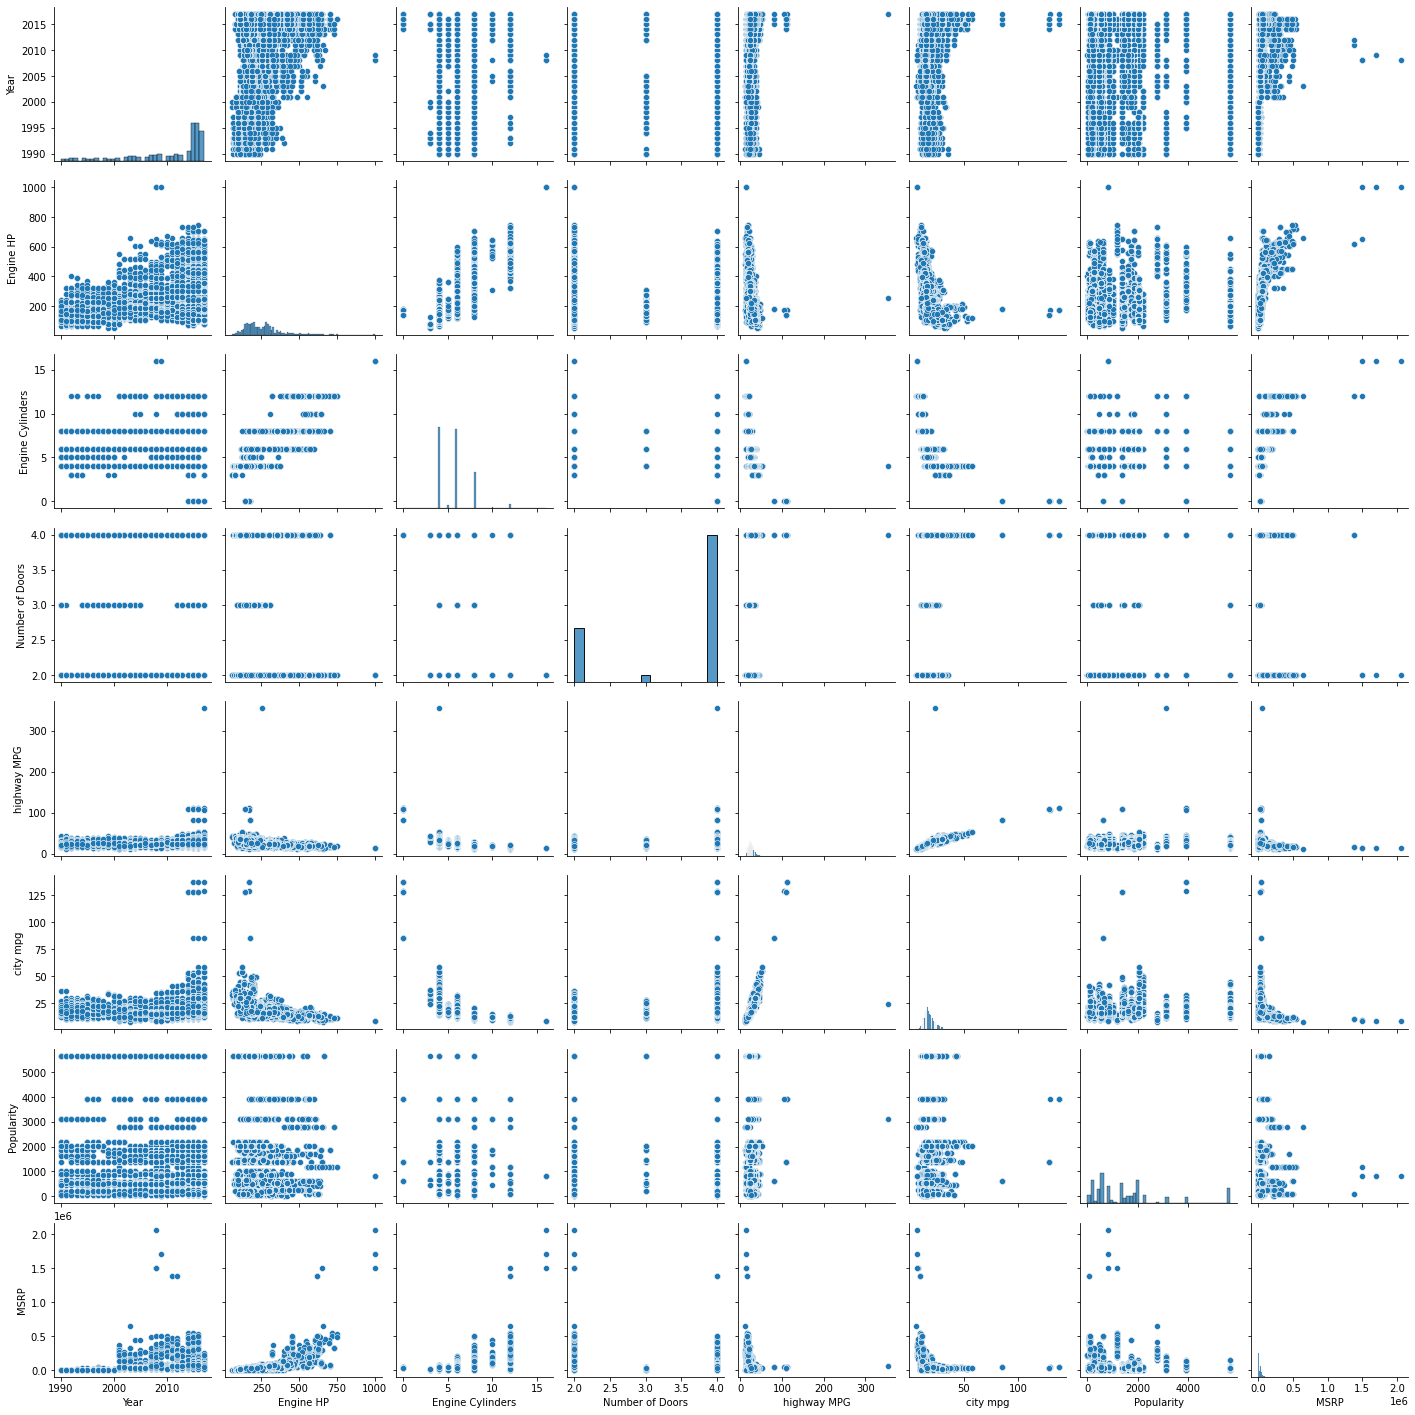

In [34]:
sns.pairplot(df)

In [35]:
high_cor

[('Engine HP', 'Year'),
 ('Engine Cylinders', 'Engine HP'),
 ('highway MPG', 'Engine HP'),
 ('highway MPG', 'Engine Cylinders'),
 ('city mpg', 'Engine HP'),
 ('city mpg', 'Engine Cylinders'),
 ('city mpg', 'highway MPG')]

As seen in the pairplot, the tuples mentioned above each exhibit sufficient linear relationship

# Analyzing highly correlated variables

In [36]:
for c1,c2 in high_cor:
    print(c1,"and",c2,"are linearly correlated to an extent of",np.round(corelation[c1][c2],2))

Engine HP and Year are linearly correlated to an extent of 0.34
Engine Cylinders and Engine HP are linearly correlated to an extent of 0.79
highway MPG and Engine HP are linearly correlated to an extent of -0.42
highway MPG and Engine Cylinders are linearly correlated to an extent of -0.61
city mpg and Engine HP are linearly correlated to an extent of -0.47
city mpg and Engine Cylinders are linearly correlated to an extent of -0.63
city mpg and highway MPG are linearly correlated to an extent of 0.84


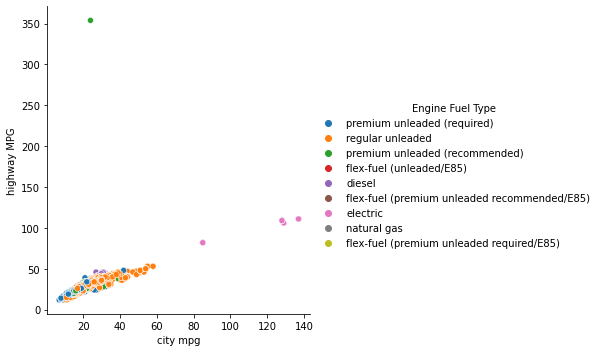

In [37]:
sns.relplot(data=df,x='city mpg', y='highway MPG', hue='Engine Fuel Type')

This verifies the linear relationship between city mpg and highway MPG

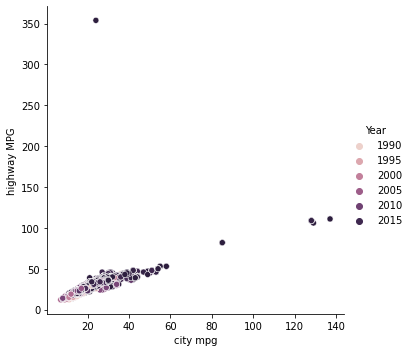

In [38]:
sns.relplot(data=df,x='city mpg', y='highway MPG', hue='Year')

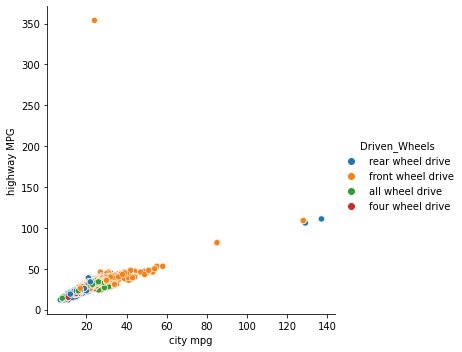

In [39]:
sns.relplot(data=df,x='city mpg', y='highway MPG', hue='Driven_Wheels')

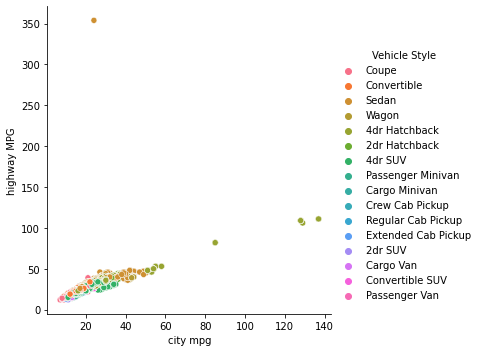

In [40]:
sns.relplot(data=df,x='city mpg', y='highway MPG', hue='Vehicle Style')

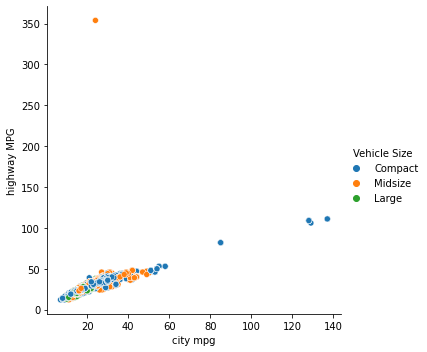

In [41]:
sns.relplot(data=df,x='city mpg', y='highway MPG', hue='Vehicle Size')

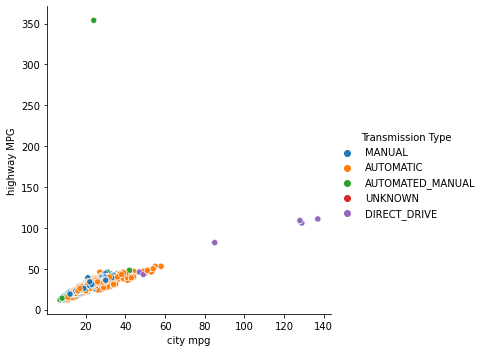

In [42]:
sns.relplot(data=df,x='city mpg', y='highway MPG', hue='Transmission Type')

As shown above, the linear relationship between `city mpg` and `highway MPG` can be clearly seen. Furthermore, we can segregate the scatter plot for each categorical feature using colours, thereby identifying the trends in the dataset.

Ex : For `Engine Fuel Type`, electric cars seem to have high mpg compared to other cars. Furthermore, we can see a single point being an outlier, which has 'Premium unleaded' Engine fuel type. 
     For `Years`, the cars produced in recent years have high highway MPG and city mpg.
     For `Transmission Type`, cars with Direct drive have high mpgs.
     

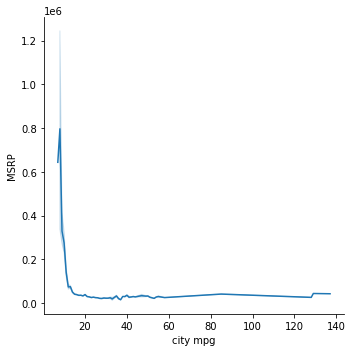

In [43]:
sns.relplot(data=df,x='city mpg', y='MSRP', kind='line')

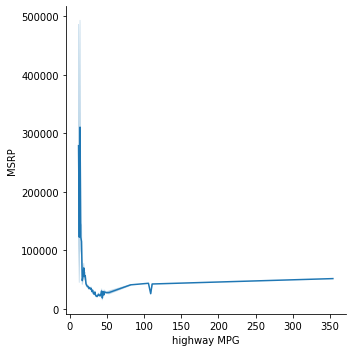

In [44]:
sns.relplot(data=df,x='highway MPG', y='MSRP', kind='line')

Both `city mpg` and `highway MPG` exhibit slight negative linear relationship with `MSRP`. That is, `MSRP` dips down until a certain point, after which it flatlines.

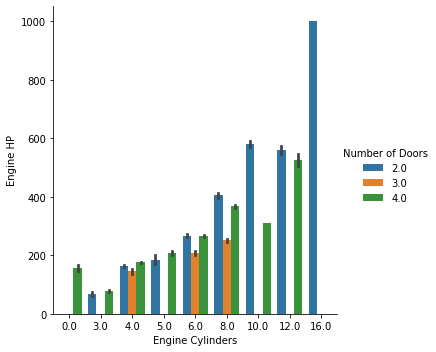

In [45]:
sns.catplot(data=df,x="Engine Cylinders",y="Engine HP", kind='bar', hue='Number of Doors')
plt.show()

We see that cars with higher `Engine cylinders` have higher `Engine HP`. Also, it is clear that only cars with `Number of Doors`=2, have high `Engine HP` and `Engine Cylinders`.

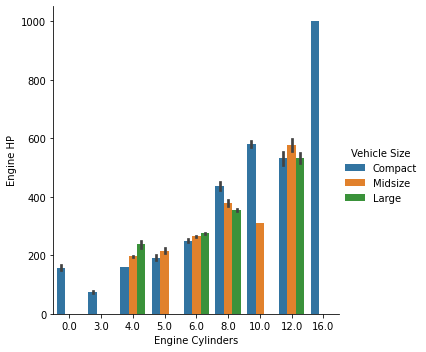

In [46]:
sns.catplot(data=df,x="Engine Cylinders",y="Engine HP", kind='bar', hue='Vehicle Size')
plt.show()

<Figure size 720x720 with 0 Axes>

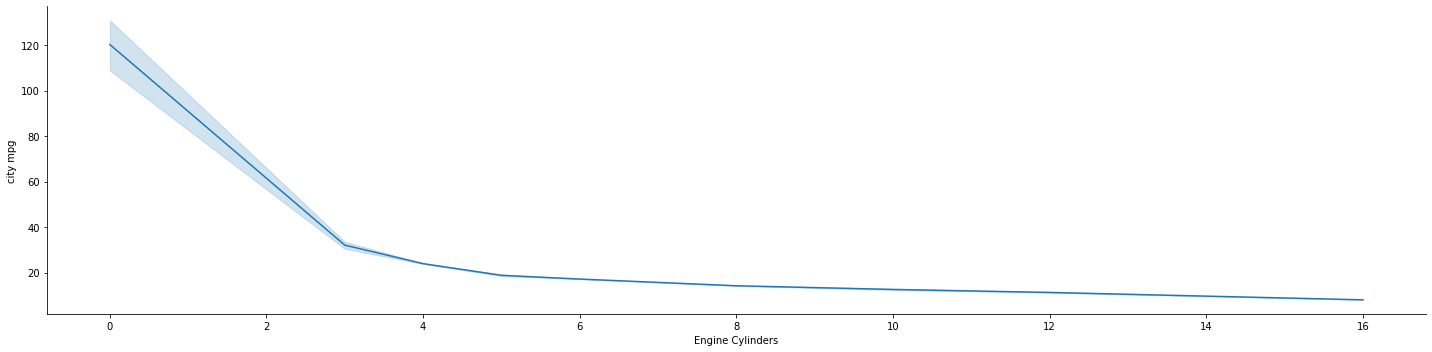

<Figure size 720x720 with 0 Axes>

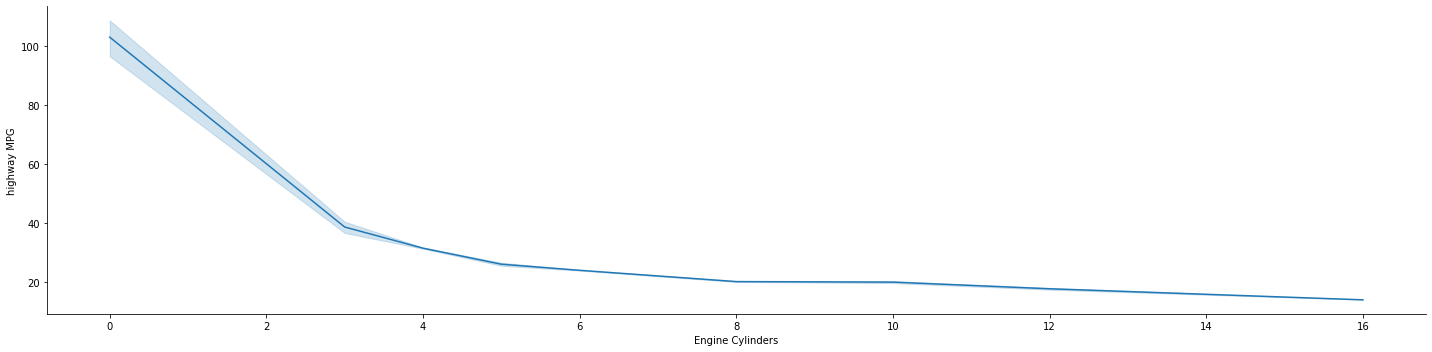

In [47]:
plt.figure(figsize = (10,10))
p=sns.relplot(data=df,x="Engine Cylinders",y="city mpg",kind='line',aspect = 4)
plt.show()
plt.figure(figsize = (10,10))
p=sns.relplot(data=df,x="Engine Cylinders",y="highway MPG",kind='line',aspect = 4)
plt.show()

Both `city mpg` and `highway MPG` exhibit negative linear relationship with `Engine cylinders`. That is, as the `Engine cylinders` increase, `city mpg` and `highway mpg` decrease.

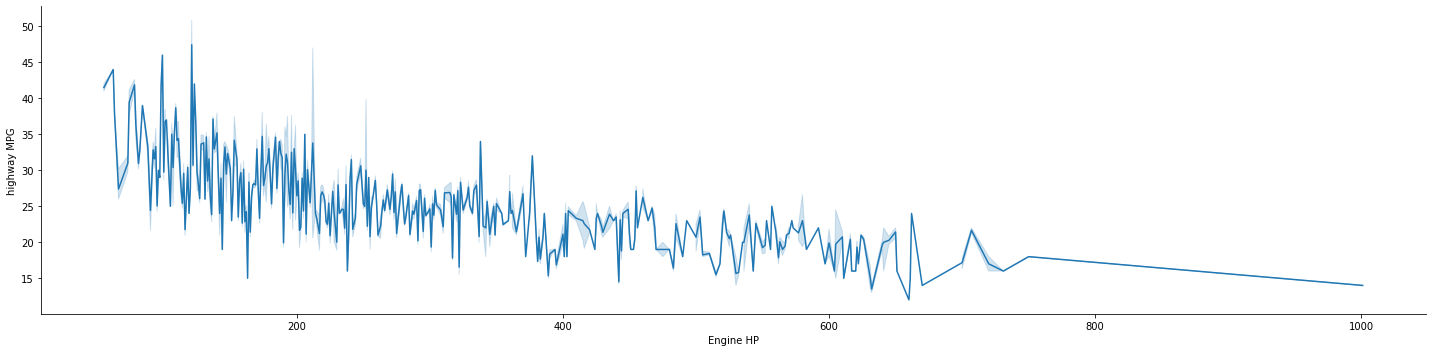

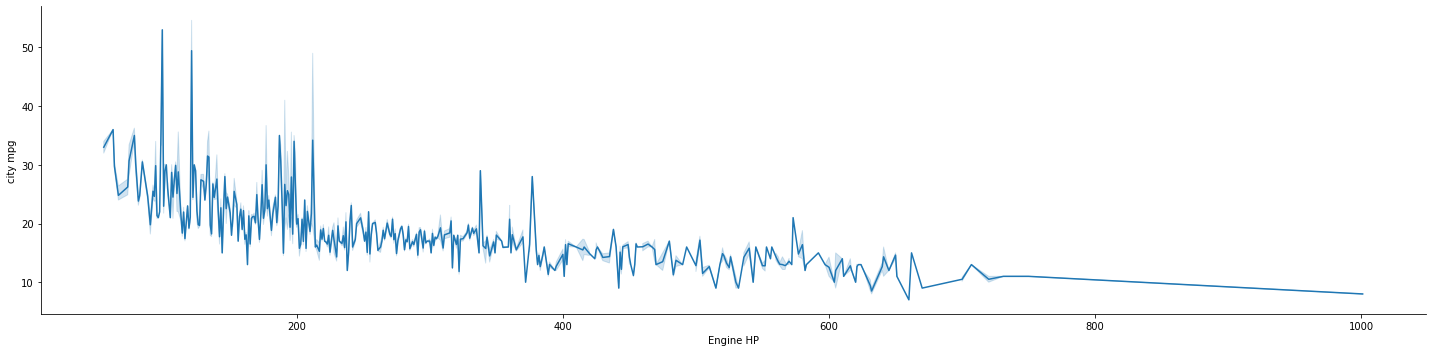

In [48]:
sns.relplot(data=df,x="Engine HP",y="highway MPG",kind='line',aspect=4)
plt.show()
sns.relplot(data=df,x="Engine HP",y="city mpg",kind='line',aspect=4)
plt.show()

In a broader sense, this does reresent a negative linear relationship of `highway MPG` with `Engine HP`, and that of `city mpg` with `Engine HP`.

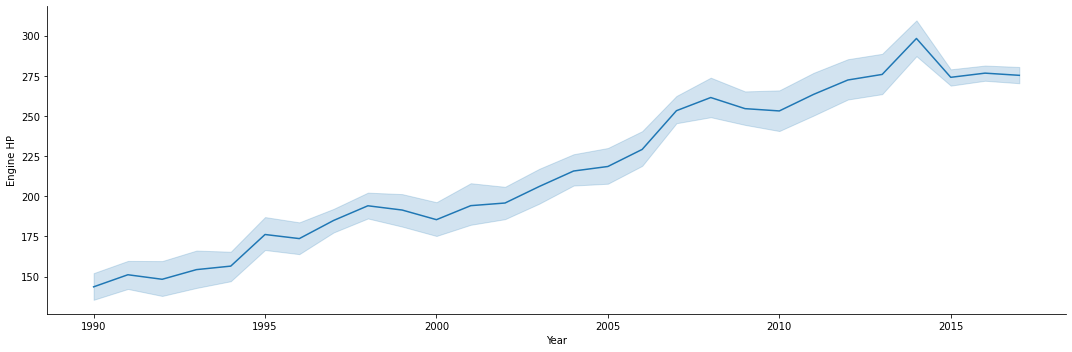

In [49]:
sns.relplot(x="Year",y="Engine HP",kind='line', data= data,height=5, aspect=3)
plt.show()

This verifies the positive linear relationship of `Year` with `Engine HP`.

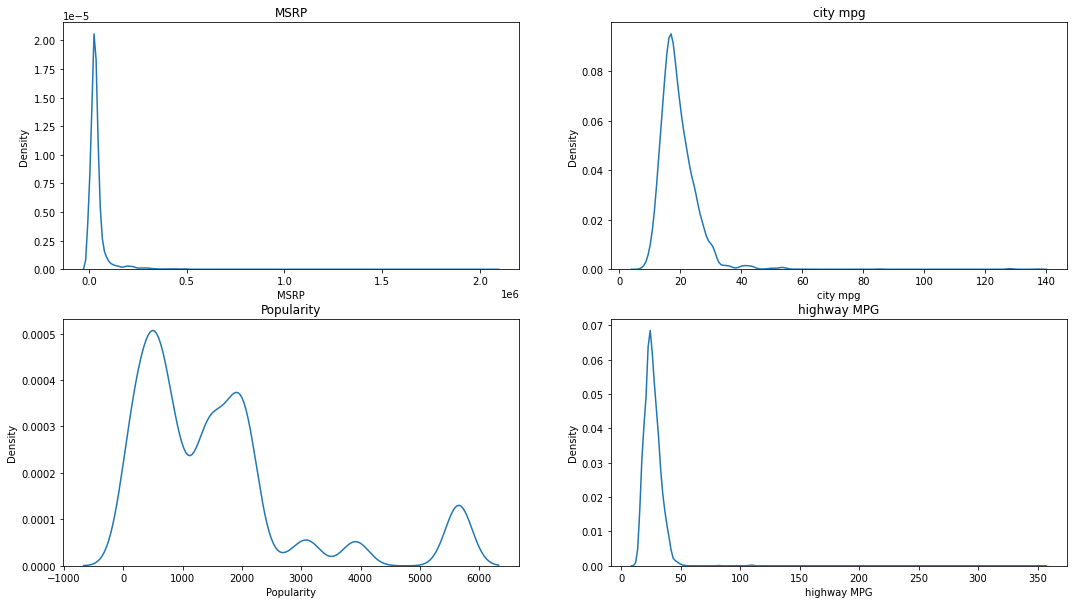

In [50]:
fig, axs = plt.subplots(2, 2,figsize=(18,10))
k=0
for i in range(2):
    for j in range(2):
        axs[i,j].set_title(cont_cols[k])
        sns.kdeplot(data[cont_cols[k]],ax=axs[i,j])
        k=k+1

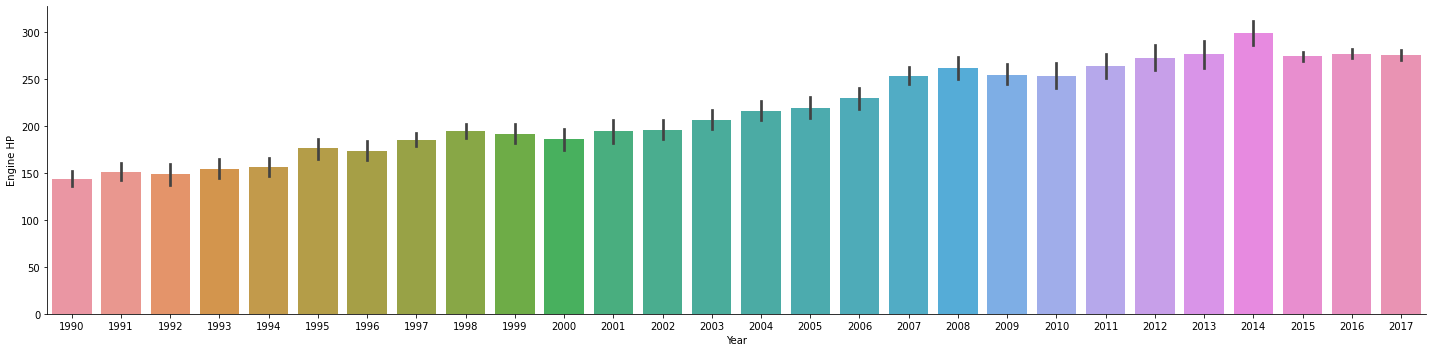

In [51]:
sns.catplot(data=df,x="Year",y="Engine HP", kind='bar', aspect=4)
plt.show()

`Engine HP` seems to have a steady increase over the `Years`, which 

SUMMARY :
The phase of EDA for the above dataset has provided with essential information about the relationship among the features and their individual distributions. I have started this phase by initially cleaning the dataset with preliminary methods(dropping null value rows/columns). 
Then I started analysing discrete numerical features with respect to their distributions and then their target variable(i.e `MSRP`)

Furthermore, a similar procedure has been carried out for continuous numerical columns, wherein I have analyzed the distribution with better and relevant tools like boxplots and distplots. I have calculated the outliers and skewness for each of these features.Correlation matrix has been used to find out highly correlated features(linear relationship).

This has been followed by the analysis of categorical variables, wherein I use bar plots to analyse their distribution and also segregate them with respect to their `MSRP`.

Fourthly, I have seperately analysed highly correlated features, applying the relevant tools such as sns.relplot and sns.catplot, in order to justify their high correlation visually. I have also tried to cluster these highly correlated features based on other categorical variables, such as `Engine Fuel Type`, `Transmission Type`, etc, in order to identify trends in the dataset with respect to these categories.

Finally, I have presented the plain distribtion curves for the numerical variables, which make better sense if they are continuous.